In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

I used two csv files for visualizing and found three columns which i had a need of, so i used it. these columns are "Income" , "State" and "GenderPop" which were helpful in our required visualization

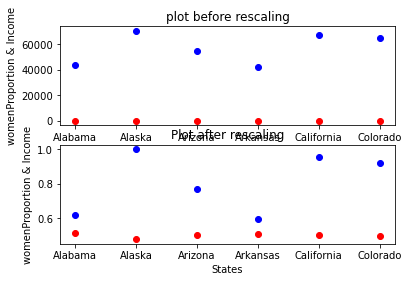

In [3]:
#reading first csv file 
df1=pd.read_csv("states0.csv")

#splitting both genders to have women proportion
splitGenderPop = df1["GenderPop"].str.split('_')

#separating both genders one by one for after works
df1["menPop"] = splitGenderPop.str.get(0)
df1["womenPop"] = splitGenderPop.str.get(1)

#removing characters M and F from male and female respectively,
#so that we can continue with numbers
df1["menPop"] = df1.menPop.str[:-1]
df1["womenPop"] = df1.womenPop.str[:-1]

#converting into numeric form from object/string type
df1["menPop"] = pd.to_numeric(df1.menPop)
df1["womenPop"] = pd.to_numeric(df1.womenPop)

#calculating women proportion among total population
womenProportion = df1["womenPop"]/df1["TotalPop"]

#removing $ sign from income and converting into numeric form
df1["Income"] = df1.Income.str[1:]
df1["Income"] = pd.to_numeric(df1.Income)

#defining x and y parameters/arguments for plotting
X=df1["State"]
Y=[womenProportion]
Y1= df1["Income"]

#dividing so that it rescale between [0,1]
Y2=(df1["Income"]/ df1["Income"].max())

#plot before rescaling the y-axis
plt.subplot(2,1,1)
plt.scatter(x=X , y=Y , color="r")
plt.scatter(x=X , y=Y1, color="b")
plt.xlabel("States")
plt.ylabel("womenProportion & Income")
plt.title("plot before rescaling")


#plot after scaling the y-axis
plt.subplot(2,1,2)
plt.scatter(x=X , y=Y , color="r")
plt.scatter(x=X , y=Y2,color="b")
plt.xlabel("States")
plt.ylabel("womenProportion & Income")
plt.title("Plot after rescaling")

plt.show()

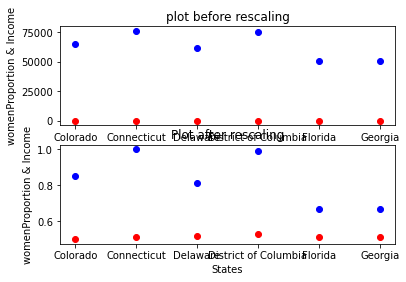

In [4]:
#reading first csv file 
df2=pd.read_csv("states1.csv")

#splitting both genders to have women proportion
splitGenderPop = df2["GenderPop"].str.split('_')

#separating both genders one by one for after works
df2["menPop"] = splitGenderPop.str.get(0)
df2["womenPop"] = splitGenderPop.str.get(1)

#removing characters M and F from male and female respectively,
#so that we can continue with numbers
df2["menPop"] = df2.menPop.str[:-1]
df2["womenPop"] = df2.womenPop.str[:-1]

#converting into numeric form from object/string type
df2["menPop"] = pd.to_numeric(df2.menPop)
df2["womenPop"] = pd.to_numeric(df2.womenPop)

#calculating women proportion among total population
womenProportion = df2["womenPop"]/df2["TotalPop"]

#removing $ sign from income and converting into numeric form
df2["Income"] = df2.Income.str[1:]
df2["Income"] = pd.to_numeric(df2.Income)

#defining x and y parameters/arguments for plotting
X=df2["State"]
Y=[womenProportion]
Y1= df2["Income"]

#dividing so that it rescale between [0,1]
Y2=(df2["Income"]/ df2["Income"].max())

#plot before rescaling the y-axis
plt.subplot(2,1,1)
plt.scatter(x=X , y=Y , color="r")
plt.scatter(x=X , y=Y1, color="b")
plt.xlabel("States")
plt.ylabel("womenProportion & Income")
plt.title("plot before rescaling")


#plot after scaling the y-axis
plt.subplot(2,1,2)
plt.scatter(x=X , y=Y , color="r")
plt.scatter(x=X , y=Y2,color="b")
plt.xlabel("States")
plt.ylabel("womenProportion & Income")
plt.title("Plot after rescaling")

plt.show()

2. using glob we iterate ovver files and then stored them one by one in the variable and make the dataframe out of that variable

In [67]:
import glob 
files = glob.glob("states*.csv")

us_census = [pd.read_csv(file) for file in files]
     
us_census = pd.concat(us_census)
    

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')


Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


<AxesSubplot:ylabel='Frequency'>

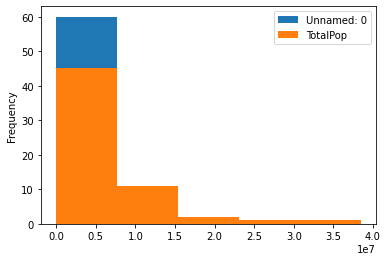

In [68]:
#Now Seeing the columns and dtypes of us_census

print(us_census.columns)
print("\n")
print(us_census.dtypes)

#Checking if the dtypes of columns hinders us or not
us_census.plot.hist(bins=5)

#as shown as output, we only got histograms of columns with dtypes=int, therefore we have to convert object-dtypes
#into int to make histograms possible 

In [69]:
us_census.head(7)

#we got the idea by seeing some of the samples of our dataframe and problem that was occuring in making colums histograms

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F


In [70]:
#Convert Income column into numeric for further manipulation

us_census["Income"] = us_census.Income.str[1:]
us_census["Income"] = pd.to_numeric(us_census.Income)

In [71]:
#splitting both genders to have women proportion
splitGenderPop = us_census["GenderPop"].str.split('_')

#separating both genders one by one for after works
us_census["menPop"] = splitGenderPop.str.get(0)
us_census["womenPop"] = splitGenderPop.str.get(1)

#removing characters M and F from male and female respectively,
#so that we can continue with numbers
us_census["menPop"] = us_census.menPop.str[:-1]
us_census["womenPop"] = us_census.womenPop.str[:-1]

#converting into numeric form from object/string type
us_census["menPop"] = pd.to_numeric(us_census.menPop)
us_census["womenPop"] = pd.to_numeric(us_census.womenPop)


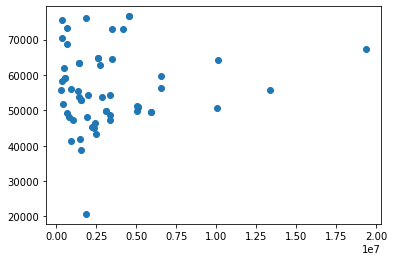

In [72]:
plt.scatter(us_census["womenPop"] , us_census["Income"])
plt.show() 

#i didn't get the error but let's move further

In [73]:
#checking the nan values per state of women column

us_census[["State" , "womenPop"]]

,State,womenPop
0,Alabama,2489527.0
1,Alaska,349215.0
2,Arizona,3342840.0
3,Arkansas,1506295.0
4,California,19334329.0
5,Colorado,2630239.0
0,Colorado,2630239.0
1,Connecticut,1841615.0
2,Delaware,478041.0
3,District of Columbia,340810.0


In [74]:
#filling nan values in women column by sybtracting men population from total population

us_census["womenPop"] = us_census["TotalPop"] - us_census["menPop"]
print(us_census["womenPop"])

#yes! now we have the data without NaNs

0     2489527
1      349215
2     3342840
3     1506295
4    19334329
5     2630239
0     2630239
1     1841615
2      478041
3      340810
4    10045763
5     5123362
0     5123362
1      696428
2      806083
3     6556862
4     3333382
5     1558931
0     1558931
1     1453125
2     2233145
3     2364097
4      679019
5     3057895
0     3057895
1     3455936
2     5038598
3     2727005
4     1536358
5     3081445
0     3081445
1      504536
2      939759
3     1390901
4      670717
5     4561386
0     4561386
1     1051703
2    10131373
3     5049925
4      353677
5     5913084
0     5913084
1     1942789
2     1990780
3     6534215
4     1869213
5      543273
0      543273
1     2455167
2      419713
3     3331859
4    13367298
5     1444150
0     1444150
1      318031
2     4195682
3     3497739
4      937789
5     2890732
Name: womenPop, dtype: int64


In [75]:
us_census.duplicated(subset=["State"])

#on the basis of states we have duplicates

0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [76]:
us_census = us_census.drop_duplicates(subset=["State"])

#but how can we drop duplicates here,  as we have data of states in every census which is necessary for many things

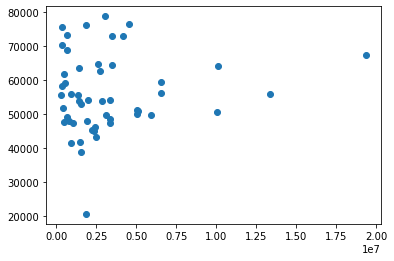

In [77]:
plt.scatter(us_census["womenPop"] , us_census["Income"])
plt.show() 


In [78]:
# checking the race categories 

us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'menPop',
       'womenPop'],
      dtype='object')

In [84]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,menPop,womenPop
0,0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093,2489527
1,1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160,349215
2,2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3299088,3342840
3,3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913M_1506295F,1451913,1506295
4,4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135M_19334329F,19087135,19334329


In [86]:
#us_census["Hispanic"] = us_census.Hispanic.str[:-1]
#us_census["White"] = us_census.White.str[:-1]
#us_census["Black"] = us_census.Black.str[:-1]
#us_census["Native"] = us_census.Native.str[:-1]
#us_census["Asian"] = us_census.Asian.str[:-1]
#us_census["Pacific"] = us_census.Pacific.str[:-1]


In [83]:
#us_census["Hispanic"] = pd.to_numeric(us_census.Hispanic)
#us_census["White"] = pd.to_numeric( us_census.White)
#us_census["Black"] = pd.to_numeric(us_census.Black)
#us_census["Native"] = pd.to_numeric(us_census.Native)
#us_census["Asian"] = pd.to_numeric(us_census.Asian)
#us_census["Pacific"] = pd.to_numeric(us_census.Pacific)


In [88]:
us_census.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
GenderPop      object
menPop          int64
womenPop        int64
dtype: object

In [90]:
us_census.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [91]:
us_census["Hispanic"] = us_census.Hispanic.fillna(us_census.Hispanic.mean())
us_census["White"] = us_census.White.fillna(us_census.White.mean())
us_census["Black"] = us_census.Black.fillna(us_census.Black.mean())
us_census["Native"] = us_census.Native.fillna(us_census.Native.mean())
us_census["Asian"] = us_census.Asian.fillna(us_census.Asian.mean())
us_census["Pacific"] = us_census.Pacific.fillna(us_census.Pacific.mean())


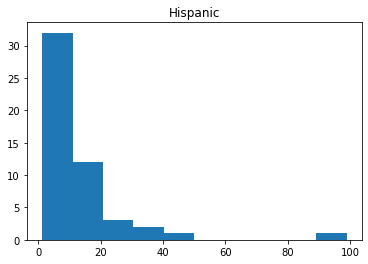

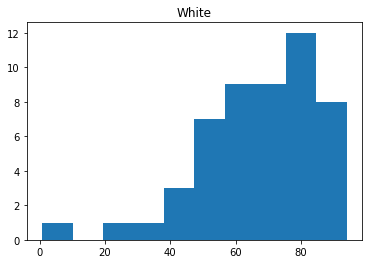

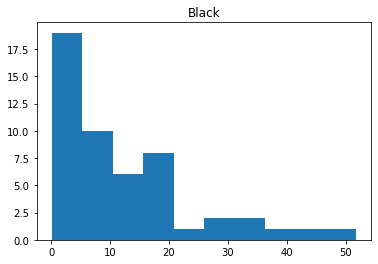

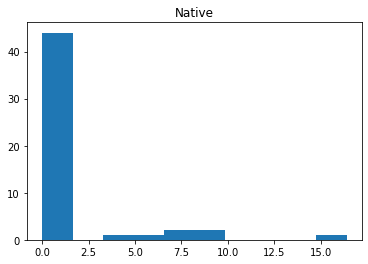

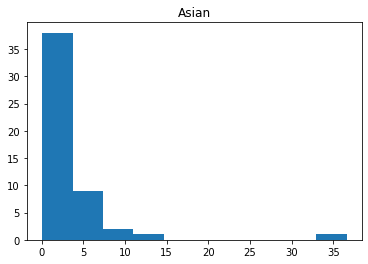

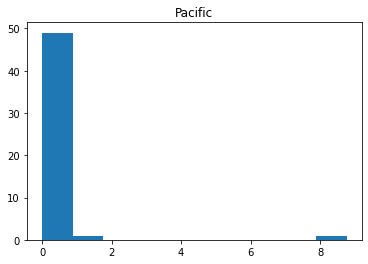

In [100]:
plt.hist(us_census["Hispanic"])
plt.title("Hispanic")
plt.show()

plt.hist(us_census["White"])
plt.title("White")
plt.show()

plt.hist(us_census["Black"])
plt.title("Black")
plt.show()

plt.hist(us_census["Native"])
plt.title("Native")
plt.show()

plt.hist(us_census["Asian"])
plt.title("Asian")
plt.show()

plt.hist(us_census["Pacific"])
plt.title("Pacific")
plt.show()


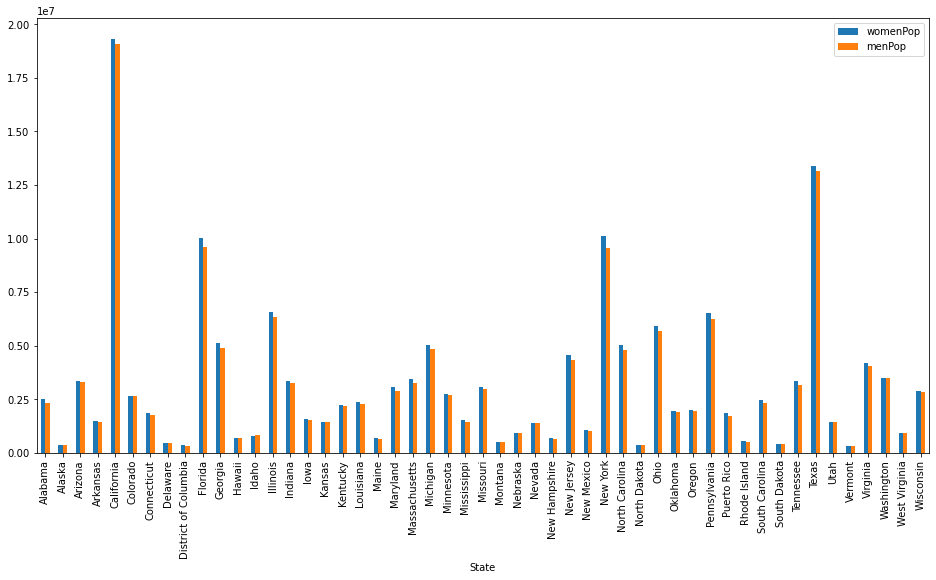

In [143]:
us_census.plot(x="State", y=["womenPop" , "menPop"], kind="bar",figsize=(16,8))
plt.show()

It seems the population of women is more than the men population almost in every state

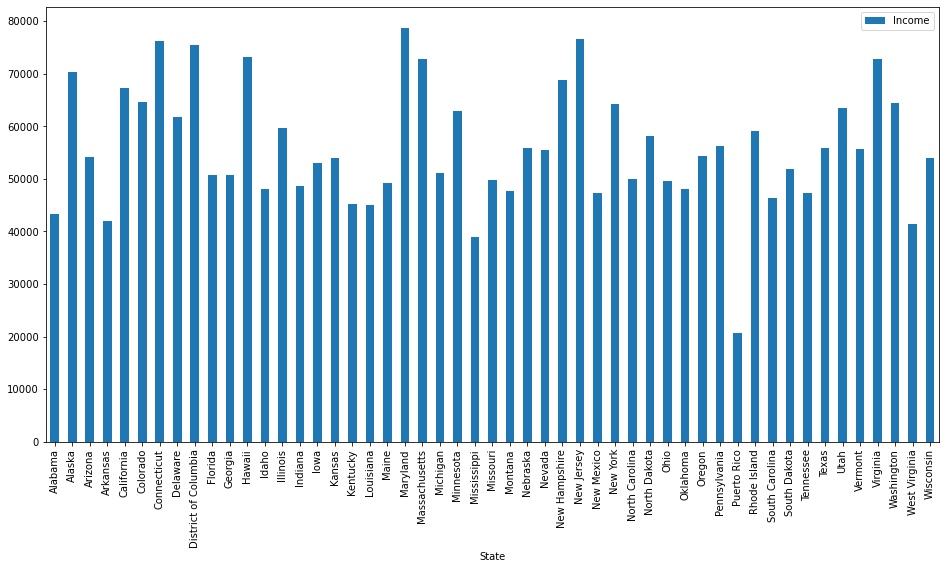

In [154]:
us_census.plot(x="State", y="Income", kind="bar",figsize=(16,8))
plt.show()

Maryland has the highest income generation among the states

# Part 2 - inventory

In [102]:
inventory = pd.read_csv("inventory.csv")
inventory

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [106]:

staten_island = inventory.head(10)

In [108]:
product_request = staten_island["product_description"]
product_request

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

In [115]:
seed_request = inventory[(inventory.location == "Brooklyn") & (inventory.product_type == "seeds")]

In [129]:
inventory['in_stock'] = inventory['quantity'] > 0

inventory["in_stock"]

0      True
1      True
2      True
3      True
4     False
5      True
6      True
7      True
8     False
9      True
10     True
11    False
12    False
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26    False
27     True
28     True
Name: in_stock, dtype: bool

In [131]:
inventory["total_value"] = inventory["price"] * inventory["quantity"]
inventory["total_value"]

0       27.96
1      919.54
2     1189.15
3       55.96
4        0.00
5     1859.07
6      961.26
7      191.92
8        0.00
9      211.47
10     349.50
11       0.00
12       0.00
13     209.85
14    7379.18
15     719.64
16    1039.20
17    1823.24
18      89.95
19     103.74
20     398.43
21    1899.05
22     629.55
23     293.79
24    8819.02
25     519.74
26       0.00
27     383.84
28    1565.13
Name: total_value, dtype: float64

In [132]:
combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)

In [139]:
inventory["full_description"] = inventory.apply(combine_lambda , axis=1)

In [140]:
inventory

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
5,Staten Island,garden tools,spade,93,19.99,True,1859.07,garden tools - spade
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26,pest_control - insect killer
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92,pest_control - weed killer
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00,planter - 20 inch terracotta planter
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47,planter - 8 inch plastic planter
